# Image Classification

In [1]:
import numpy as np
 #penCV-Python is a library of Python bindings designed to solve computer vision problems. 
#cv2.imread() method loads an image from the specified file. If the image cannot be read (because of the missing file,
#improper permissions, or unsupported or invalid format) then this method returns an empty matrix.
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread("D:/PROJECT/DS Project/Classification Project/Test data/015_bca34e2c.jpg")

img.shape


(518, 474, 3)

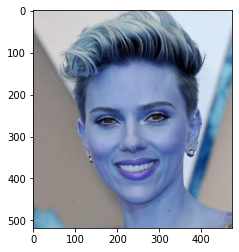

In [3]:
plt.imshow(img);
# It's a color photo and have RGB value


In [4]:
# Now I want to gray shape of this image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(518, 474)

In [5]:
gray

array([[216, 215, 213, ..., 243, 245, 245],
       [215, 214, 212, ..., 240, 244, 244],
       [214, 213, 211, ..., 236, 242, 242],
       ...,
       [151, 152, 151, ..., 109,  99, 109],
       [ 96, 104, 119, ..., 114, 147, 166],
       [ 98, 106, 125, ..., 101, 139, 166]], dtype=uint8)

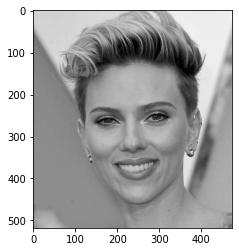

In [6]:
plt.imshow(gray, cmap='gray');

In [7]:
face_cascade = cv2.CascadeClassifier("D:/PROJECT/DS Project/Classification Project/OpenCV/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("D:/PROJECT/DS Project/Classification Project/OpenCV/haarcascade_eye.xml")
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 79, 138, 311, 311]])

In [8]:
# These 4 values are X , Y , Width, Height which suggest where the face
#Now we can print the face

In [9]:
(x,y,w,h) = faces[0]
x,y,w,h

(79, 138, 311, 311)

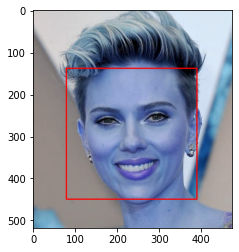

In [10]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img);

In [11]:
# Now we write a code which detect eyes
# this code is available on OpenCV haar cascade page


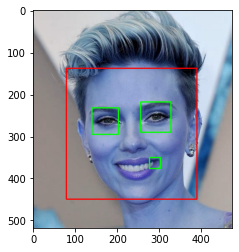

In [12]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        


plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

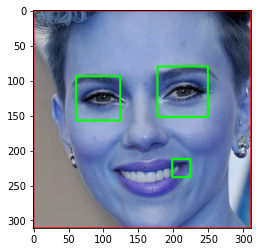

In [13]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray');

In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

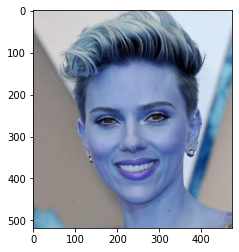

In [15]:
original_image = cv2.imread("D:/PROJECT/DS Project/Classification Project/Test data/015_bca34e2c.jpg")
plt.imshow(original_image);

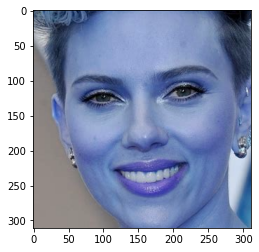

In [16]:
cropped_image = get_cropped_image_if_2_eyes("D:/PROJECT/DS Project/Classification Project/Test data/015_bca34e2c.jpg")
plt.imshow(cropped_image);

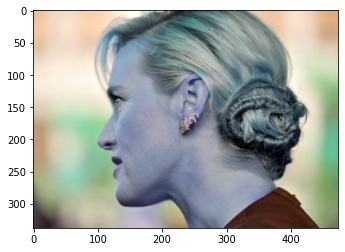

In [17]:
org_image_obstructed = cv2.imread("D:/PROJECT/DS Project/Classification Project/Test data/56_ghy_876_5th.jpg")
plt.imshow(org_image_obstructed);

In [18]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes("D:/PROJECT/DS Project/Classification Project/Test data/56_ghy_876_5th.jpg")
cropped_image_no_2_eyes

Now I want to create crop all the images in my dataset

In [19]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [20]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [21]:
img_dirs

['./dataset/Angelina Jolie',
 './dataset/cropped',
 './dataset/Jennifer Lawrence',
 './dataset/Kate Winslet',
 './dataset/Megan Fox',
 './dataset/Natalie Portman',
 './dataset/Scarlett Johansson']

In [22]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [23]:
import os

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Unable to read image from", image_path)
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_color = img[y:y+h, x:x+w]
        return roi_color
    return None

# Ensure the face cascade classifier is loaded
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Assuming you have defined img_dirs and path_to_cr_data earlier

cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print('Generating cropped images in folder:', cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
                
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Angelina Jolie
Generating cropped images in folder: ./dataset/cropped/Angelina Jolie
cropped
Error: Unable to read image from ./dataset/cropped\Angelina Jolie
Jennifer Lawrence
Generating cropped images in folder: ./dataset/cropped/Jennifer Lawrence
Kate Winslet
Generating cropped images in folder: ./dataset/cropped/Kate Winslet
Megan Fox
Generating cropped images in folder: ./dataset/cropped/Megan Fox
Natalie Portman
Generating cropped images in folder: ./dataset/cropped/Natalie Portman
Scarlett Johansson
Generating cropped images in folder: ./dataset/cropped/Scarlett Johansson


1. Import necessary libraries:

We  import the os library for working with the operating system, specifically for directory handling.

2. Define the get_cropped_image_if_2_eyes() function:

This function takes an image file path as input.
It attempts to read the image using cv2.imread().
If the image is successfully read, it converts it to grayscale using cv2.cvtColor().
It then uses a Haar Cascade classifier (face_cascade) to detect faces in the grayscale image.
If a face is detected, it extracts the region of interest (ROI) around the face, which will later be cropped to include only the face.
The function returns the cropped face image (roi_color) if a face is detected, otherwise None.

3. Load the Haar Cascade classifier:

A Haar Cascade classifier for face detection is loaded using cv2.CascadeClassifier().
The classifier data is provided by cv2.data.haarcascades to ensure the correct path is used.

4. Iterate through the image directories (img_dirs):

For each img_dir (directory), a variable celebrity_name is created by extracting the last part of the path (presumably the celebrity's name).
A dictionary entry is created in celebrity_file_names_dict with celebrity_name as the key and an empty list as the value. This dictionary will store the list of cropped image file paths for each celebrity.

5. Iterate through the files in each image directory:

For each entry (file or subdirectory) in the current img_dir, the get_cropped_image_if_2_eyes() function is called to attempt face detection and cropping.
If the function returns a valid cropped face image (roi_color is not None), the code proceeds to save the cropped face image in a new directory specific to the celebrity.

6. Handling the cropped images:

If the cropped images folder for the current celebrity does not exist, it is created using os.makedirs().
The path to the cropped folder is added to the cropped_image_dirs list.
The cropped image file is saved in this folder using cv2.imwrite().
The file path is added to the list under the corresponding celebrity key in the celebrity_file_names_dict dictionary.


Overall, the code performs face detection on images in each directory (img_dirs). If a face is detected in an image, the face is cropped and saved in a separate folder (path_to_cr_data) named after the celebrity, and the file paths of the cropped images are stored in the celebrity_file_names_dict dictionary. The cropped_image_dirs list keeps track of the directories where cropped images have been saved.






In [24]:
celebrity_file_names_dict

{'Angelina Jolie': ['./dataset/cropped/Angelina Jolie\\Angelina Jolie1.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie2.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie3.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie4.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie5.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie6.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie7.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie8.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie9.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie10.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie11.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie12.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie13.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie14.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie15.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie16.png',
  './dataset/cropped/Angelina J

# Now you should have cropped folder under datasets folder that contains cropped images¶
Manually examine cropped folder and delete any unwanted images

In [25]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Angelina Jolie': ['./dataset/cropped/Angelina Jolie\\Angelina Jolie1.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie10.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie11.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie12.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie13.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie14.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie15.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie16.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie17.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie18.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie19.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie2.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie20.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie21.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie22.png',
  './dataset/cropped/Angelina Jolie\\Angelina Jolie23.png',
  './dataset/cropped/Ang

In [26]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Angelina Jolie': 0,
 'Jennifer Lawrence': 1,
 'Kate Winslet': 2,
 'Megan Fox': 3,
 'Natalie Portman': 4,
 'Scarlett Johansson': 5}

(3) **Preprocessing: Use wavelet transform as a feature for traning our model**

In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

****Wavelet transform****



In [27]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

1. Function Signature:

The w2d() function takes three arguments:
img: The input image as a NumPy array in RGB format (3-channel image).
mode: The wavelet family to use for decomposition. The default is 'haar'.
level: The level of wavelet decomposition. The default is 1.

2. Data Preparation:

The function first creates a copy of the input image array and assigns it to the variable imArray.
The input image is then converted to grayscale using cv2.cvtColor() with the cv2.COLOR_RGB2GRAY conversion code.
The grayscale image is converted to floating-point format (np.float32) to ensure more precise calculations during the wavelet transform.
The pixel values are normalized to the range [0, 1] by dividing by 255.

3. Wavelet Transform:

The function performs a 2D wavelet decomposition (pywt.wavedec2()) on the normalized grayscale image imArray.
The wavelet transform decomposes the image into multiple levels of approximation and detail coefficients.

4. Process Coefficients:

The approximation coefficients at the lowest level (coeffs_H[0]) are zeroed out (coeffs_H[0] *= 0). This means that the finest details of the image are discarded, and only the low-frequency information is kept.

5. Inverse Wavelet Transform (Reconstruction):

The modified wavelet coefficients (coeffs_H) are used to reconstruct the image using the inverse wavelet transform (pywt.waverec2()).
The reconstructed image is in floating-point format and still scaled in the range [0, 1].

6. Scaling and Data Type Conversion:

The reconstructed image imArray_H is rescaled to the range [0, 255] by multiplying by 255.
The pixel values are then converted back to 8-bit unsigned integer format (np.uint8) to represent the image in the conventional 8-bit format.

7. Return:

The function returns the resulting reconstructed image imArray_H, which represents an enhanced version of the input image with fine details removed.


In summary, the w2d() function performs a 2D wavelet decomposition on an input RGB image, converts it to grayscale, discards fine details, and then reconstructs the image using the modified wavelet coefficients. This process enhances the image by emphasizing its low-frequency information and suppressing high-frequency noise. The function allows you to control the level of decomposition and the choice of wavelet family. Commonly used wavelet families include 'haar', 'db' (Daubechies), 'sym' (Symlet), etc.






Image is nothing but a bunch of pixels. the value of each pixel in grayscale in between 0-255.
0 is absolute darkness and 255 is pure white anything is between corresponds a grayscale value.
Image can be presented in spatial domain like(X, Y) or it can be represented as a frequency domain.
Audio signals are represented in a time domain or a frequency domain .

for more follow this video
https://www.youtube.com/watch?v=xrTor1uw5iI

Fourier Transform will take a complex signal and it will return you the basic signals, which make that signal so complex.
   

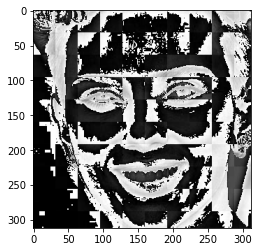

In [28]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray');

# Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [29]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        #scalling image in same dimension
        scalled_img_har = cv2.resize(img_har, (32, 32))
        #for vertically stack both images np.vstack will help us to do it. 32*32*3 because it's a colorful image 
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [30]:
len(X[0]) #(32*32*3)+ (32*32) = 4096
#32*32*3 where 3 is for RGB and for wavelet transform image have another 32*32

4096

In [31]:
X[0]

array([[249],
       [228],
       [226],
       ...,
       [  3],
       [243],
       [227]], dtype=uint8)

In [32]:
y[0]

0

In [33]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(584, 4096)

In [34]:
X[0]

array([249., 228., 226., ...,   3., 243., 227.])

# Model 

In [35]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7123287671232876

In [37]:
len(X_test)

146

In [38]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        22
           1       0.42      0.62      0.50        16
           2       0.88      0.30      0.45        23
           3       0.87      0.87      0.87        15
           4       1.00      0.54      0.70        24
           5       0.67      0.96      0.79        46

    accuracy                           0.71       146
   macro avg       0.78      0.68      0.69       146
weighted avg       0.78      0.71      0.70       146



Preciion and recall, f1 score 

# Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [39]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [40]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto', probability=True),
        'params' : {
            'svc__C': [1, 10, 100, 1000],
            'svc__kernel': ['rbf', 'linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C': [1, 5, 10]
        }
    }
}


In [41]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.664472,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.433699,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.698668,{'logisticregression__C': 5}


In [42]:

best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

In [43]:

best_estimators['svm'].score(X_test,y_test)

0.7054794520547946

In [44]:
best_estimators['random_forest'].score(X_test,y_test)

0.4931506849315068

In [45]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7054794520547946

In [46]:
best_clf = best_estimators['svm']

Accuracy = (TP+TN)/(TP+FP+FN+TN) where TP-> True Positive, FP-> False Positive, FN-> False Negative, TN-> True Negative

Precision:
Precision is the ratio of the correctly +ve labeled by our program to all +ve labeled.
Precision = TP/(TP+FP)

Recall = TP/(TP+FN)

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[17,  1,  2,  0,  1,  1],
       [ 2,  8,  0,  0,  2,  4],
       [ 2,  9,  8,  0,  1,  3],
       [ 2,  0,  0, 13,  0,  0],
       [ 3,  0,  1,  3, 13,  4],
       [ 0,  2,  0,  0,  0, 44]], dtype=int64)

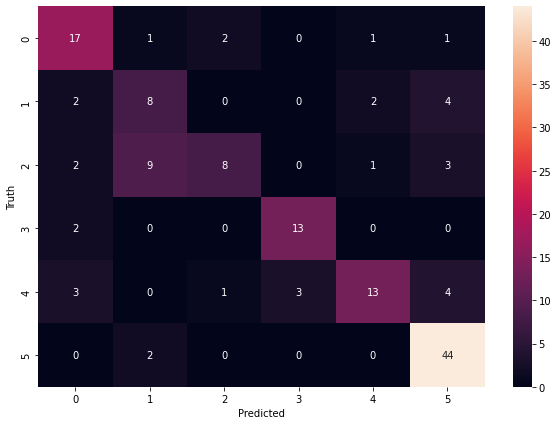

In [49]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth');

# Confusion Matrix:

In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa).The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabeling one as another).

In [50]:

class_dict

{'Angelina Jolie': 0,
 'Jennifer Lawrence': 1,
 'Kate Winslet': 2,
 'Megan Fox': 3,
 'Natalie Portman': 4,
 'Scarlett Johansson': 5}

# Save the trained model

In [51]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

# Save class dictionary


In [52]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))